### Importing Important Libraries

In [85]:
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Reading Data

In [43]:
# 'latin-1' is a type of encoding and is used to solve the UnicodeDecodeError. It is a single-byte encoding.
df = pd.read_csv('spam.csv', encoding='latin-1')

In [44]:
# Fetching first 2 columns
df = df[["v1","v2"]]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [45]:
# Renaming the column to dsired column name
df.columns = ["label","text"]

In [46]:
# Adding new column length to find each sms length
df.loc[:,"length"] = [len(sms) for sms in df["text"]]

### Data Exploration

In [47]:
df.shape

(5572, 3)

In [48]:
df.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [49]:
df.tail()

,label,text,length
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125
5571,ham,Rofl. Its true to its name,26


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
 2   length  5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [51]:
df.describe()

,length
count,5572.000000
mean,80.118808
std,59.690841
min,2.000000
25%,36.000000
50%,61.000000
75%,121.000000
max,910.000000


In [52]:
df["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### Exploratory Data Analysis

<AxesSubplot:xlabel='length', ylabel='Count'>

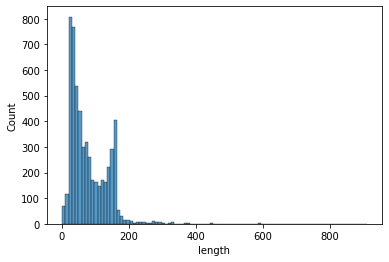

In [53]:
# Maximum messages length is between the range of 0-100
sb.histplot(df["length"])

<AxesSubplot:xlabel='length', ylabel='Count'>

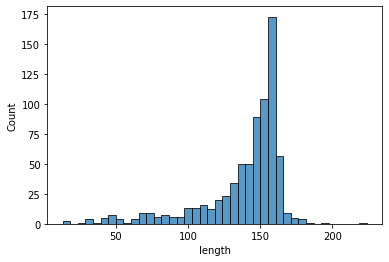

In [54]:
sb.histplot(df[df["label"]=="spam"]["length"])

<AxesSubplot:xlabel='length', ylabel='Count'>

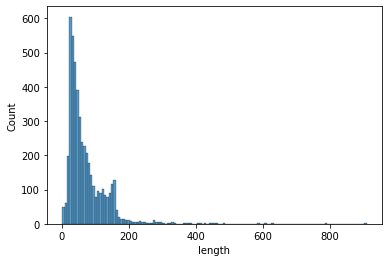

In [55]:
sb.histplot(df[df["label"]=="ham"]["length"])

### Splitting the data into training and testing set

In [64]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 42)

In [65]:
x_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 4457, dtype: object

In [66]:
x_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: text, Length: 1115, dtype: object

### NLP Pre processing Steps

In [73]:
count_vector = CountVectorizer(lowercase=True, token_pattern='(?u)\\b\\w\\w+\\b', stop_words='english')

In [74]:
train = count_vector.fit_transform(x_train)
train

<4457x7472 sparse matrix of type '<class 'numpy.int64'>'
	with 34794 stored elements in Compressed Sparse Row format>

In [75]:
test = count_vector.transform(x_test)
test

<1115x7472 sparse matrix of type '<class 'numpy.int64'>'
	with 7693 stored elements in Compressed Sparse Row format>

### Naive Bayes Model

In [76]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(train, y_train)

MultinomialNB()

In [77]:
predictions = naive_bayes.predict(test)

### Comparing Result of the Model

In [83]:
result = pd.DataFrame({"Original Result" : y_test.values, "Predicted Result" : predictions})
result

,Original Result,Predicted Result
0,ham,ham
1,ham,ham
2,spam,spam
3,ham,ham
4,spam,spam
...,...,...
1110,ham,ham
1111,ham,ham
1112,ham,ham
1113,ham,ham


### Accuracy of the Model

In [88]:
accuracy_score(y_test, predictions)

0.9838565022421525